## Logistic Regression - Diabetes 

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("diabetes.csv")

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## HANDLING MISSING VALUES 

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## HANDLING THE OUTLIERS 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: >

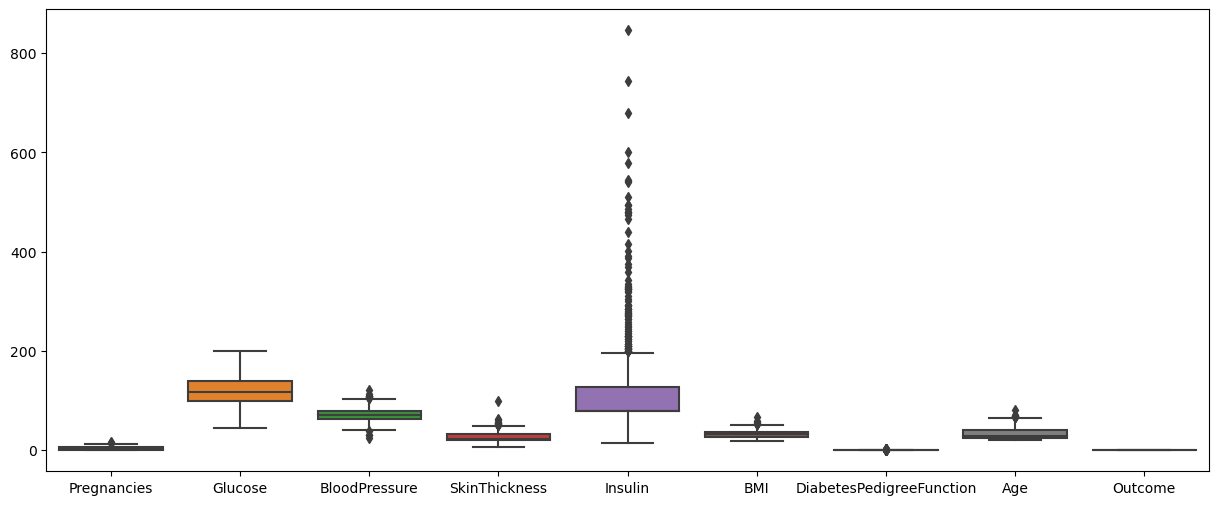

In [19]:
plt.figure(figsize = (15,6))
sns.boxplot(data = data)

## SEGGREGATE BETWEEN DEPENDENT AND INDEPENDENT FEATURE


In [21]:

X = data.drop(columns=['Outcome'])
y = data['Outcome']

## SEPARATE DATASET Into TRAIN TEST SPLIT

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((576, 8), (192, 8))

## STANDARD SCALING

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## SAVING THE MODEL - PICKLING 

In [24]:
import pickle 

In [25]:
pickle.dump(scaler,open('scaler.pkl', 'wb'))

## PERFORM LOGISTIC REGRESSION

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

## HYPER PARAMETER TRAINING - GRID SEARCH CV

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
parameters = { 'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-3, 3, 7),
              'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
             }

In [31]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,
                   param_grid= parameters,
                   scoring='accuracy',
                   cv = 10)

In [32]:
clf.fit(X_train_scaled, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [33]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [34]:
clf.best_score_

0.763793103448276

In [38]:
y_pred = clf.predict(X_test_scaled)

## CONFUSION MATRIX 

In [37]:
from sklearn.metrics import confusion_matrix

In [42]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]])

In [43]:
tp = conf_mat [0][0] 
fp = conf_mat [0][1]
fn = conf_mat [1][0]
tn = conf_mat [1][1]

In [44]:
accuracy = (tp+tn)/(tp+tn+fn+fp)
accuracy

0.796875

In [45]:
precision = tp/(tp+fp)
precision

0.9

In [46]:
recall = tp/(tp+fn)
recall

0.8181818181818182

In [47]:
f1_score = 2*(recall*precision)/(recall+precision)
f1_score

0.8571428571428572

## PICKLE ON LOGISTIC REGRESSION

In [48]:
pickle.dump(log_reg,open('modelforprediction.pkl', 'wb'))